# Yelp Data Challenge - NLP

BitTiger DS501

Jun 2017

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
%matplotlib inline

In [2]:
cd ..

/Users/zirongwu/DataScience/DS501/BitTiger-DS501-1805/Homework/Yelp_Data_Challenge_Project


In [3]:
df = pd.read_csv('dataset/last_2_years_restaurant_reviews.csv') # data/last_2_years_restaurant_reviews.csv

In [4]:
df.head()

,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5,1,2015-08-02,0,UgwmWy_68S_aKR9wTWKGOg,3,I am a huge fan of both locally owned business...,4,jSD05fFrAFa5gX3ZQae1tw
1,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5,2,2015-06-08,2,AywPsODuQbUMhBEjmKiGXw,1,Let me start off by saying. If you cant make a...,8,oagZh5A2cWJXZBLakS_KpQ
2,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5,1,2015-08-08,0,6j39TEUBDBTEK37OKACWLw,1,Decent product. ..HORRIBLE service. Totally un...,2,6BSwuyc7fvcccJgrY4_W5Q
3,Subway,"Fast Food, Restaurants, Sandwiches",2.5,0,2016-07-03,0,c6iTbCMMYWnOd79ZiWwobg,1,"I ordered a few 12 inch sandwiches , a turkey ...",1,ih7Dmu7wZpKVwlBRbakJOQ
4,Subway,"Fast Food, Restaurants, Sandwiches",2.5,0,2018-03-10,0,5iDdZvpK4jOv2w5kZ15TUA,1,Worst subway of any I have visited. I have man...,1,m3WBc9bGxn1q1ikAFq8PaA


In [54]:
df.shape

(640718, 11)

### Define your feature variables, here is the text of the review

In [5]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = df.text.values

In [6]:
# inspect your documents, e.g. check the size, take a peek at elements of the numpy array
documents.shape

(640718,)

### Define your target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [7]:
# Make a column and take the values, save to a variable named "target"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640718 entries, 0 to 640717
Data columns (total 11 columns):
name          640718 non-null object
categories    640718 non-null object
avg_stars     640718 non-null float64
cool          640718 non-null int64
date          640718 non-null object
funny         640718 non-null int64
review_id     640718 non-null object
stars         640718 non-null int64
text          640718 non-null object
useful        640718 non-null int64
user_id       640718 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 53.8+ MB


In [8]:
# set the stars and bin it to perfect or imperfect
target = np.where(df.stars <= 4, 0, 1)

In [9]:
target

array([0, 0, 0, ..., 0, 0, 0])

#### You may want to look at the statistic of the target variable

In [10]:
# To be implemented
stats.describe(target)

DescribeResult(nobs=640718, minmax=(0, 1), mean=0.4741461922405801, variance=0.2493319697689701, skewness=0.1035537583710436, kurtosis=-1.9892766191272317)

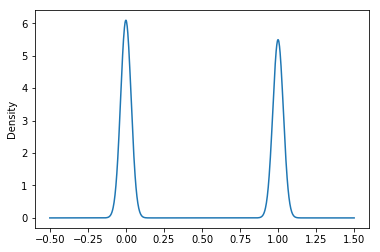

In [14]:
pd.Series(target, name = 'target').plot.density()

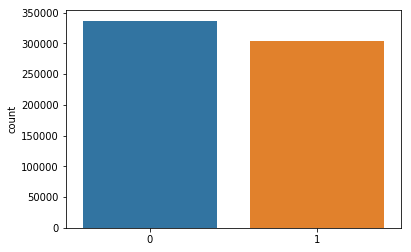

In [12]:
sns.countplot(target);

In [33]:
documents

array(["I am a huge fan of both locally owned businesses and cupcakes.  Cakes By Toi combines these loves with an okay result.  I decided to stop by on my way home after a long day at work, and after telling myself repeatedly I would stop in and try this place.\n\nIt is in your typical small strip mall.  Walking up it appeared they may also sell some sort of Thai food for lunch although when I walked in I only saw the bakery area. The interior is very plain, which is fine as I was there for the cupcakes. Sprucing it up a bit wouldn't hurt. They had a couple cases that had cupcakes and cakes ready to go.  The staff behind the counter were very friendly, and I got the sense by the ages that it may be members of the family all working there.\n\nThe cupcake, the most important thing, were okay.  There were reasonably priced, especially compared to certain designer cupcake bakeries.  I purchased half a dozen to share with the family.  The flavors were good as were a few of the frostings.  M

## Let's create training dataset and test dataset

In [15]:
from sklearn.cross_validation import train_test_split

/Users/zirongwu/Documents/py3/py3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
# Documents is your X, target is your y
# Now split the data to training set and test set
x = documents
y = target

In [17]:
# Split to documents_train, documents_test, target_train, target_test
documents_train, documents_test, target_train, target_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

## Let's get NLP representation of the documents

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [64]:
wordnet = WordNetLemmatizer()

# lemmatize
def lemmatize(doc):
    return [wordnet.lemmatize(word) for word in word_tokenize(doc.lower())]

In [67]:
# Create TfidfVectorizer, and name it vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = stopwords.words('english'), max_features=2000,
                                  tokenizer = lemmatize)

In [68]:
# Train the model with your training data
tfidf_matrix = tfidf_vectorizer.fit_transform(documents_train).todense()

In [69]:
tfidf_matrix.shape

(448502, 2000)

In [70]:
# get the vocal of tfidf_matrix
words = tfidf_vectorizer.get_feature_names()

In [71]:
words

['!',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '--',
 '.',
 '..',
 '...',
 '/',
 '1',
 '1.',
 '1/2',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '1st',
 '2',
 '2.',
 '20',
 '24',
 '25',
 '2nd',
 '3',
 '3.',
 '3.5',
 '30',
 '35',
 '3rd',
 '4',
 '4.',
 '4/5',
 '40',
 '45',
 '5',
 '5/5',
 '50',
 '6',
 '60',
 '7',
 '8',
 '9',
 '90',
 ':',
 ';',
 '=',
 '?',
 '@',
 '``',
 'able',
 'absolute',
 'absolutely',
 'accommodate',
 'accommodating',
 'across',
 'actual',
 'actually',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'admit',
 'adult',
 'advance',
 'affordable',
 'afternoon',
 'ago',
 'agree',
 'agreed',
 'ahead',
 'ahi',
 'aioli',
 'air',
 'airport',
 'al',
 'alcohol',
 'alfredo',
 'allergy',
 'allow',
 'allowed',
 'almond',
 'almost',
 'alone',
 'along',
 'already',
 'alright',
 'also',
 'although',
 'always',
 'amazing',
 'amazingly',
 'ambiance',
 'ambience',
 'america

In [72]:
# Use the trained model to transform your test data
tfidf_test = tfidf_vectorizer.transform(documents_test).todense()

In [73]:
tfidf_test.shape

(192216, 2000)

## Similar review search engine

In [98]:
import numpy as np

# We will need these helper methods pretty soon

def get_top_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the highest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["cat", "pig"]
    '''
    return [labels[i] for i in np.argsort(lst)[::-1][:n]]  # np.argsort by default sorts values in ascending order

def get_bottom_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the lowest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["mouse", "rabbit"]
    '''
    return [labels[i] for i in np.argsort(lst)[::1][:n]]  # To be implemented


In [26]:
# Let's use cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
# Draw an arbitrary review from test (unseen in training) documents
abreview = documents_test[8]
abreview

'Great burger but absolutely terrible service.  If you train your wait staff to remember orders without writing them down you should be absolutely sure they can pull it off without forgetting things.  Hate restaurants that do this'

In [40]:
# Transform the drawn review(s) to vector(s)
abreview_vect = tfidf_vectorizer.transform([abreview]).todense()

In [61]:
abreview_vect.shape

(1, 2000)

In [62]:
tfidf_matrix.T.shape

(2000, 448502)

In [59]:
# Calculate the similarity score(s) between vector(s) and training vectors
cosscore = cosine_similarity(abreview_vect.reshape(1, -1), tfidf_matrix)

In [60]:
cosscore.shape

(1, 448502)

In [79]:
cosscore[0]

array([0.        , 0.0290711 , 0.00385391, ..., 0.05013891, 0.0117163 ,
       0.0551903 ])

In [82]:
# Let's find top 5 similar reviews
n = 5
topfive = get_top_values(cosscore[0], n, range(tfidf_matrix.shape[0]))

In [83]:
documents_train[topfive]

array(["Absolutely terrible service, the staff just hangs out outside dancing and snap chatting. Definitely won't be back.",
       "Perfect restaurant, waitstaff and food. Excellent. I'm not sure how I can expand on that further. I hate long dissertations on restaurants and this place doesn't need one. It's absolutely wonderful and I will be back.",
       "Truly urban and turban....\nCustomer Service is absolutely great!  Sure place to go if you're in Vegas!\nRemember to check for Jose !",
       'This place is absolutely awesome!! The food and service were absolutely amazing!!! Prices were great and the food was soo fresh.',
       "Horrible dining experience and bad customer service. We were highly disappointed in Brio restaurant service. The food was absolutely terrible and without our consent our orders were changed and customized to a leftover uncooked fettuccine. Never returning to Brio again and we weren't the only unsatisfied and disappointed customers!"],
      dtype=object)

In [85]:
print('Our search query:')
print(abreview) # To be added

Our search query:
Great burger but absolutely terrible service.  If you train your wait staff to remember orders without writing them down you should be absolutely sure they can pull it off without forgetting things.  Hate restaurants that do this


In [86]:
print('Most %s similar reviews:' % n)
print(documents_train[topfive])  # To be added

Most 5 similar reviews:
["Absolutely terrible service, the staff just hangs out outside dancing and snap chatting. Definitely won't be back."
 "Perfect restaurant, waitstaff and food. Excellent. I'm not sure how I can expand on that further. I hate long dissertations on restaurants and this place doesn't need one. It's absolutely wonderful and I will be back."
 "Truly urban and turban....\nCustomer Service is absolutely great!  Sure place to go if you're in Vegas!\nRemember to check for Jose !"
 'This place is absolutely awesome!! The food and service were absolutely amazing!!! Prices were great and the food was soo fresh.'
 "Horrible dining experience and bad customer service. We were highly disappointed in Brio restaurant service. The food was absolutely terrible and without our consent our orders were changed and customized to a leftover uncooked fettuccine. Never returning to Brio again and we weren't the only unsatisfied and disappointed customers!"]


#### Q: Does the result make sense to you?

A: Yes. From the result, the key words are similar with the query, which are 'absolutely', 'terrible', 'service', 'back', etc. However, some of them are not having the same sentiment.

## Classifying positive/negative review

#### Naive-Bayes Classifier

In [88]:
# Build a Naive-Bayes Classifier

from sklearn.naive_bayes import MultinomialNB

clf_nb = MultinomialNB()
clf_nb.fit(tfidf_matrix, target_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [89]:
# Get score for training set
clf_nb.score(tfidf_matrix, target_train)

0.8110956026951942

In [90]:
# Get score for test set
clf_nb.score(tfidf_test, target_test)

0.8099377783327091

#### Logistic Regression Classifier

In [91]:
# Build a Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(tfidf_matrix, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
# Get score for training set
clf_lr.score(tfidf_matrix, target_train)

0.8365982760389028

In [93]:
# Get score for test set
clf_lr.score(tfidf_test, target_test)

0.8362259125150872

In [95]:
clf_lr.coef_.shape

(1, 2000)

#### Q: What are the key features(words) that make the positive prediction?

In [96]:
# Let's find it out by ranking
n = 20
get_top_values(clf_lr.coef_[0], n, words)

['amazing',
 'best',
 'incredible',
 'phenomenal',
 'heaven',
 'awesome',
 'thank',
 'fantastic',
 'perfect',
 'delicious',
 'excellent',
 'perfection',
 'outstanding',
 '5/5',
 'impeccable',
 '5',
 'perfectly',
 'favorite',
 'highly',
 'great']

A: The key features are all positive words. It means that the review with positive words will lead to high rating stars.

#### Q: What are the key features(words) that make the negative prediction?

In [99]:
# Let's find it out by ranking
n = 20
get_bottom_values(clf_lr.coef_[0], n, words)

['worst',
 'horrible',
 'rude',
 'disappointing',
 'terrible',
 'bland',
 'mediocre',
 'ok.',
 'lacked',
 'disgusting',
 'awful',
 'okay',
 'poor',
 'worse',
 'slow',
 'lacking',
 'ok',
 'meh',
 'overpriced',
 'tasteless']

A: On the contrary, the negative prediction were alongwith the negative words and neutral words.

#### Random Forest Classifier

In [102]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(tfidf_matrix, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [103]:
# Get score for training set
clf_rf.score(tfidf_matrix, target_train)

0.9906867750868447

In [104]:
# Get score for test set
clf_rf.score(tfidf_test, target_test)

0.7837432888000999

#### Q: What do you see from the training score and the test score?

A: There has overfitting in this model. The training score is extremely high but the test score is low.

#### Q: Can you tell what features (words) are important by inspecting the RFC model?

In [108]:
n = 20
get_top_values(clf_rf.feature_importances_, n, words)

['!',
 'amazing',
 'best',
 'great',
 'delicious',
 'wa',
 "n't",
 'love',
 '.',
 '$',
 'awesome',
 'vega',
 'good',
 'definitely',
 'pretty',
 'favorite',
 'bad',
 'decent',
 'excellent',
 'nothing']

The top 20 important features are the combination of positive words and negative words. Most of them are positive words.

## Extra Credit #1: Use cross validation to evaluate your classifiers

[sklearn cross validation](http://scikit-learn.org/stable/modules/cross_validation.html)

In [116]:
# To be implemented
from sklearn.model_selection import cross_val_score
# Logistic Regression
scores = cross_val_score(clf_lr, tfidf_matrix, target_train, cv=5, scoring='f1_macro')

In [117]:
scores.mean()

0.8337718893581118

In [118]:
# NB
scores_nb = cross_val_score(clf_nb, tfidf_matrix, target_train, cv = 5, scoring='f1_macro')

In [119]:
scores_nb.mean()

0.8101979117147147

In [120]:
# rf
scores_rf = cross_val_score(clf_rf, tfidf_matrix, target_train, cv = 5, scoring='f1_macro')

In [121]:
scores_rf.mean()

0.7803414889175777

## Extra Credit #2: Use grid search to find best predictable classifier


[sklearn grid search tutorial (with cross validation)](http://scikit-learn.org/stable/modules/grid_search.html#grid-search)

[sklearn grid search documentation (with cross validation)](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
clf_rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# To be implemented
param_grid_nb = [{'criterion': ['']}]